# Modeling the Difference Between Measures

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd

In [3]:
import statsmodels.formula.api as smf
import pandas as pd
import os
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import statsmodels.api as sm

In [6]:
import seaborn as sns

In [10]:
pwd

'/Users/knaaptime/Dropbox/projects/seg_networks/notebooks/scratch'

In [7]:
sns.set_context('paper')

In [8]:
sns.set_style('whitegrid')

In [146]:
df = gpd.read_parquet("../../data/model_data.parquet")

In [12]:
df.columns

Index(['n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg',
       'streets_per_node_avg', 'intersection_count', 'street_length_total',
       'street_segment_count', 'street_length_avg', 'circuity_avg',
       'self_loop_proportion', 'node_density_km', 'intersection_density_km',
       'edge_density_km', 'street_density_km', 'node_props_dead_end',
       'node_props_3way', 'node_props_4way', 'name', 'planar_measure',
       'network_measure', 'seg_difference', 'p_value', 'ALAND', 'AWATER',
       'population', 'pop_density', 'geometry', 'cyclomatic', 'meshedness',
       'gamma', 'pct_diff', 'significant'],
      dtype='object')

In [356]:
df.head()

,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,intersection_count,street_length_total,street_segment_count,street_length_avg,...,ALAND,AWATER,population,pop_density,geometry,cyclomatic,meshedness,gamma,pct_diff,significant
fips,,,,,,,,,,,,,,,,,,,,,
20020,23860,63104,-0.245635,1.503965e+07,238.331192,0.975350,9.817167,15.833054,10.359392,5.473661,...,22.214958,17.321567,11.904143,-10.310815,"POLYGON ((-85.08765 31.30868, -85.08764 31.307...",10.577579,-0.245219,-0.245206,3.144263,0.0
29180,38486,103626,0.094125,2.278258e+07,219.853877,0.991786,10.301794,16.248359,10.855396,5.392963,...,22.901300,21.577308,13.102771,-9.798529,"POLYGON ((-91.36884 30.05882, -91.36882 30.058...",11.084309,0.093979,0.093974,11.333441,0.0
39820,40395,103126,-0.898263,2.896298e+07,280.850398,0.938728,10.285377,16.488382,10.850560,5.637822,...,23.003469,19.041467,12.097284,-10.906185,"POLYGON ((-121.32288 40.58492, -121.32288 40.5...",11.046627,-0.898501,-0.898513,43.077829,1.0
17140,349061,909164,-0.531089,8.863501e+07,97.490672,0.957768,12.456092,17.606890,13.027134,4.579757,...,23.189268,19.204044,14.605130,-8.584138,"POLYGON ((-84.47630 38.54272, -84.47725 38.539...",13.235878,-0.532090,-0.532130,20.479758,1.0
19300,44161,110706,-1.225689,1.727599e+07,156.052835,0.919244,10.348077,15.971681,10.921486,5.050195,...,22.138550,20.848096,12.266796,-9.871754,"POLYGON ((-87.61542 31.04100, -87.61542 31.040...",11.105649,-1.226014,-1.226032,4.461160,0.0


In [98]:
df.shape

(186, 34)

In [100]:
df[df.significant==1].shape

(92, 34)

In [15]:
df.columns

Index(['n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg',
       'streets_per_node_avg', 'intersection_count', 'street_length_total',
       'street_segment_count', 'street_length_avg', 'circuity_avg',
       'self_loop_proportion', 'node_density_km', 'intersection_density_km',
       'edge_density_km', 'street_density_km', 'node_props_dead_end',
       'node_props_3way', 'node_props_4way', 'name', 'planar_measure',
       'network_measure', 'seg_difference', 'p_value', 'ALAND', 'AWATER',
       'population', 'pop_density', 'geometry', 'cyclomatic', 'meshedness',
       'gamma', 'pct_diff', 'significant'],
      dtype='object')

In [101]:
features = [
    "k_avg",
    "streets_per_node_avg",
    "street_length_total",
    "street_segment_count",
    "street_length_avg",
    "street_density_km",
    "circuity_avg",
    "intersection_count",
    "intersection_density_km",
    "self_loop_proportion",
    "node_props_dead_end",
    "node_props_3way",
    "node_props_4way",
    "cyclomatic",
    "gamma",
    "meshedness",
    "ALAND",
    "AWATER",
    'population',
    'pop_density'
]

In [61]:
df[features].corr()

,k_avg,streets_per_node_avg,street_length_total,street_segment_count,street_length_avg,street_density_km,circuity_avg,intersection_count,intersection_density_km,self_loop_proportion,node_props_dead_end,node_props_3way,node_props_4way,cyclomatic,gamma,meshedness,ALAND,AWATER,population,pop_density
k_avg,1.000000,0.999800,0.174812,0.184314,-0.049380,-0.003012,-0.368338,0.185910,0.117747,-0.496090,-0.965407,-0.215885,0.907692,0.196907,1.000000,1.000000,0.193158,0.128444,0.159828,0.107143
streets_per_node_avg,0.999800,1.000000,0.165541,0.174938,-0.037853,-0.009874,-0.372653,0.176556,0.109148,-0.496226,-0.965541,-0.216365,0.908234,0.187611,0.999813,0.999813,0.187172,0.121251,0.152081,0.098427
street_length_total,0.174812,0.165541,1.000000,0.965856,-0.252969,0.428127,0.051288,0.966689,0.471649,-0.123753,-0.183776,0.060872,0.103409,0.963784,0.174341,0.174353,0.583029,0.327529,0.889691,0.560839
street_segment_count,0.184314,0.174938,0.965856,1.000000,-0.372365,0.538575,0.021800,0.999880,0.597573,-0.089669,-0.181242,0.015347,0.130551,0.999664,0.183874,0.183884,0.430593,0.378269,0.932411,0.680899
street_length_avg,-0.049380,-0.037853,-0.252969,-0.372365,1.000000,-0.612396,0.107107,-0.370711,-0.650920,-0.246570,0.010803,0.097402,-0.066819,-0.369280,-0.048878,-0.048893,0.131304,-0.208541,-0.293882,-0.505590
street_density_km,-0.003012,-0.009874,0.428127,0.538575,-0.612396,1.000000,0.014194,0.536922,0.958576,0.170700,0.003426,0.028172,-0.022538,0.535023,-0.003406,-0.003394,-0.161612,0.022123,0.470328,0.743105
circuity_avg,-0.368338,-0.372653,0.051288,0.021800,0.107107,0.014194,1.000000,0.020912,-0.004951,0.014364,0.380698,0.006080,-0.309755,0.018040,-0.368439,-0.368437,0.086558,-0.035918,0.015371,0.005844
intersection_count,0.185910,0.176556,0.966689,0.999880,-0.370711,0.536922,0.020912,1.000000,0.595475,-0.089759,-0.184748,0.022303,0.128883,0.999642,0.185471,0.185482,0.432105,0.378242,0.933299,0.680473
intersection_density_km,0.117747,0.109148,0.471649,0.597573,-0.650920,0.958576,-0.004951,0.595475,1.000000,0.106725,-0.097285,-0.049583,0.106804,0.596022,0.117323,0.117335,-0.074657,0.147954,0.519900,0.800373
self_loop_proportion,-0.496090,-0.496226,-0.123753,-0.089669,-0.246570,0.170700,0.014364,-0.089759,0.106725,1.000000,0.438354,0.259107,-0.514333,-0.096416,-0.496207,-0.496201,-0.260122,-0.057133,-0.107736,0.019549


In [149]:
log_features = [
    'network_measure',
    'planar_measure',
    "streets_per_node_avg",
    "street_length_total",
    "street_segment_count",
    "street_length_avg",
    "street_density_km",
    "circuity_avg",
    "intersection_count",
    "intersection_density_km",
    "self_loop_proportion",
    "node_props_4way",
    "cyclomatic",
    "ALAND",
    "AWATER",
    'population',
    'pop_density',

]

In [150]:
logmap = dict(zip(log_features, [np.log for i in range(len(log_features))]))

In [151]:
# these variables are normal, so convert to Z. Others get logged in the formula

z_features = [
    "node_props_dead_end",
    "node_props_3way",
    "meshedness",
    "k_avg",
    "gamma",
]

In [152]:
from scipy.stats import zscore

In [153]:
zmap = dict(zip(z_features, [zscore for i in range(len(z_features))]))

In [154]:
mapper = {**logmap, **zmap}

In [155]:
mapper

{'network_measure': <ufunc 'log'>,
 'planar_measure': <ufunc 'log'>,
 'streets_per_node_avg': <ufunc 'log'>,
 'street_length_total': <ufunc 'log'>,
 'street_segment_count': <ufunc 'log'>,
 'street_length_avg': <ufunc 'log'>,
 'street_density_km': <ufunc 'log'>,
 'circuity_avg': <ufunc 'log'>,
 'intersection_count': <ufunc 'log'>,
 'intersection_density_km': <ufunc 'log'>,
 'self_loop_proportion': <ufunc 'log'>,
 'node_props_4way': <ufunc 'log'>,
 'cyclomatic': <ufunc 'log'>,
 'ALAND': <ufunc 'log'>,
 'AWATER': <ufunc 'log'>,
 'population': <ufunc 'log'>,
 'pop_density': <ufunc 'log'>,
 'node_props_dead_end': <function scipy.stats._stats_py.zscore(a, axis=0, ddof=0, nan_policy='propagate')>,
 'node_props_3way': <function scipy.stats._stats_py.zscore(a, axis=0, ddof=0, nan_policy='propagate')>,
 'meshedness': <function scipy.stats._stats_py.zscore(a, axis=0, ddof=0, nan_policy='propagate')>,
 'k_avg': <function scipy.stats._stats_py.zscore(a, axis=0, ddof=0, nan_policy='propagate')>,
 'g

In [156]:
df[z_features]

,node_props_dead_end,node_props_3way,meshedness,k_avg,gamma
fips,,,,,
20020,0.231098,0.657460,0.822488,5.289522,0.881661
29180,0.226056,0.628956,0.846350,5.385127,0.897568
30980,0.235871,0.677048,0.805819,5.223052,0.870547
39820,0.274638,0.621067,0.776530,5.105879,0.851022
17140,0.264283,0.605788,0.802307,5.209198,0.868205
...,...,...,...,...,...
25060,0.254782,0.645746,0.795166,5.180496,0.863445
22380,0.212994,0.653043,0.852795,5.410990,0.901864
48260,0.296751,0.603574,0.750100,4.999816,0.833405


In [157]:
df[z_features] = df[z_features].apply(zscore)

In [158]:
df[log_features] = df[log_features].apply(np.log)

In [159]:
df[z_features].describe().round(3)

,node_props_dead_end,node_props_3way,meshedness,k_avg,gamma
count,373.000,373.000,373.000,373.000,373.000
mean,-0.000,0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001
min,-2.304,-3.881,-2.526,-2.525,-2.526
25%,-0.760,-0.556,-0.753,-0.754,-0.753
50%,-0.040,0.049,-0.003,-0.004,-0.003
75%,0.697,0.745,0.697,0.698,0.697
max,2.729,2.415,2.776,2.775,2.776


In [161]:
df = df[df.seg_difference>0]

In [162]:
df_subset = df[df.significant==1]

In [163]:
df.shape

(369, 34)

In [164]:
df_subset.shape

(92, 34)

In [166]:
df.describe()

,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,intersection_count,street_length_total,street_segment_count,street_length_avg,...,p_value,ALAND,AWATER,population,pop_density,cyclomatic,meshedness,gamma,pct_diff,significant
count,3.690000e+02,3.690000e+02,369.000000,3.690000e+02,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,...,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,9.424172e+04,2.560939e+05,0.012429,3.140905e+07,174.542237,0.986372,10.539803,16.164748,11.097662,5.067086,...,0.239409,22.222936,18.646391,12.679321,-9.543614,11.321928,0.012429,0.012429,20.068365,0.249322
std,1.548870e+05,4.315368e+05,0.997288,3.831399e+07,82.702477,0.052293,1.030832,0.825797,1.030277,0.426346,...,0.226631,0.866756,1.761764,1.075954,0.925193,1.036229,0.997288,0.997288,10.974303,0.433208
min,6.894000e+03,1.918600e+04,-2.525445,3.974152e+06,64.948387,0.844281,8.622634,14.502175,9.168789,4.173593,...,0.000000,19.740679,14.252226,10.906543,-12.742437,9.416785,-2.526237,-2.526295,0.464367,0.000000
25%,2.235900e+04,5.859400e+04,-0.737895,1.168721e+07,115.922539,0.948674,9.726333,15.580858,10.285240,4.752922,...,0.053000,21.569779,17.371515,11.877825,-10.112849,10.489634,-0.737440,-0.737422,12.074869,0.000000
50%,4.252900e+04,1.124100e+05,0.021795,1.843896e+07,151.749568,0.987881,10.364734,16.036829,10.936761,5.022232,...,0.186800,22.212104,18.506570,12.428904,-9.539125,11.147296,0.020816,0.020785,18.494811,0.000000
75%,8.955700e+04,2.378580e+05,0.707020,3.290646e+07,213.038949,1.022902,11.111582,16.616031,11.686282,5.361475,...,0.338600,22.838633,19.893286,13.254766,-8.953542,11.879511,0.706001,0.705981,26.090514,0.000000
max,1.290221e+06,3.644396e+06,2.774862,2.939655e+08,643.348427,1.123274,13.859077,18.805826,14.415553,6.466686,...,0.971200,24.980976,23.215264,16.776786,-6.797903,14.671701,2.776480,2.776478,69.350566,1.000000


## $\Delta_{\tilde{H}}$

In [167]:
df[df.isnull().any(axis=1)][z_features]

,node_props_dead_end,node_props_3way,meshedness,k_avg,gamma
fips,,,,,


In [ ]:
df_sub = df_transformed[df_transformed.sig

In [168]:
df.dropna().shape

(369, 34)

In [169]:
form_diff = (
    "seg_difference ~ 1 + np.log(planar_measure) + np.log(street_length_total) + np.log(street_length_avg) +"
    "np.log(intersection_density_km) + np.log(self_loop_proportion) +  np.log(circuity_avg) + node_props_dead_end + node_props_3way +I(node_props_3way**2)+ np.log(node_props_4way) + np.log(cyclomatic) + np.log(meshedness)  +"
    "np.log(population) + np.log(pop_density) + np.log(ALAND) + np.log(AWATER)"
)

In [325]:
form_diff_pure = (
    "seg_difference ~ 1 + planar_measure + street_length_total + street_length_avg + street_density_km + "
    "intersection_density_km + self_loop_proportion +  circuity_avg + cyclomatic + meshedness  +"
    "population + pop_density + ALAND + AWATER + cyclomatic:meshedness + cyclomatic:circuity_avg")

In [ ]:
form_diff_pure_reduced = (
    "seg_difference ~ 1 + planar_measure +"
    "circuity_avg+intersection_density_km+self_loop_proportion+cyclomatic+meshedness+ALAND"
)

In [326]:
model_diff = smf.ols(form_diff_pure, df).fit()

In [327]:
model_diff_sub = smf.ols(form_diff_pure, df_subset).fit()

<AxesSubplot:>

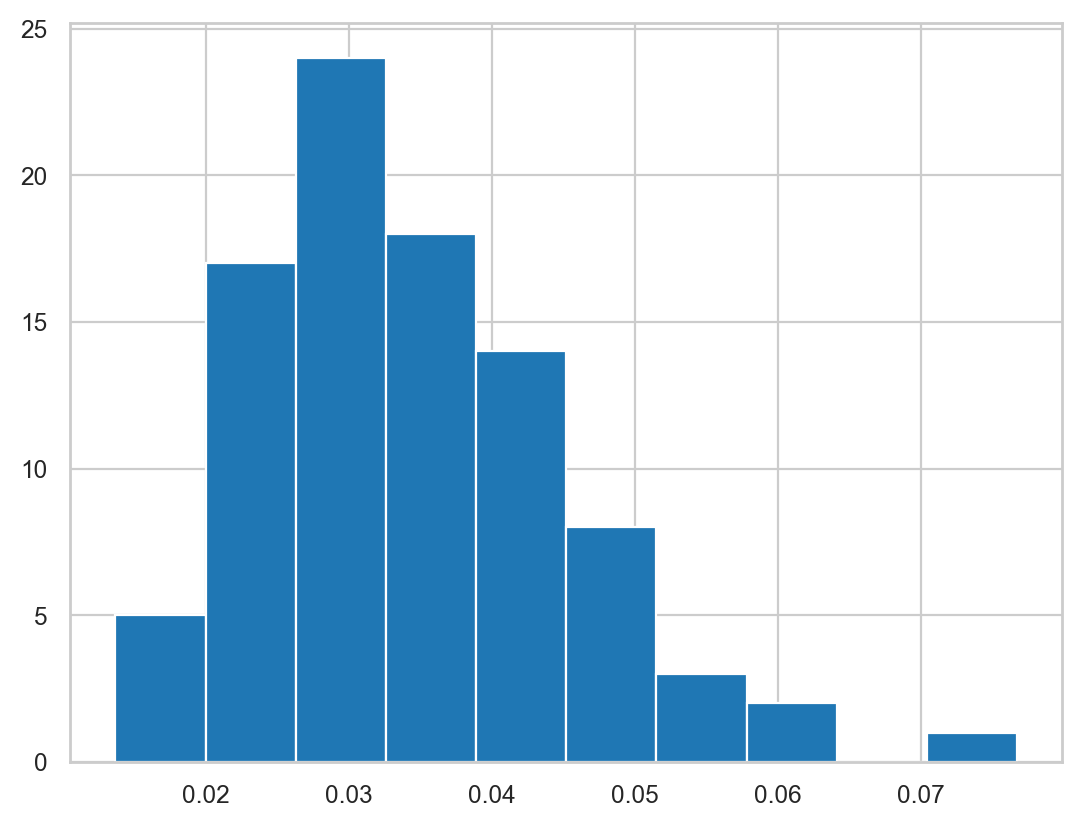

In [328]:
df_subset.seg_difference.hist()

In [329]:
model_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         seg_difference   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.582
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.49e-05
Time:                        14:00:09   Log-Likelihood:                 1150.1
No. Observations:                 369   AIC:                            -2270.
Df Residuals:                     354   BIC:                            -2211.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0846      0.098     -0.860      0.391      -0.278       0.109
planar_measure              0.0022      0.002      1.388      0.166      -0.001       0.005
street_length_total        -0.1255      0.242     -0.518      0.605      -0.602       0.351
street_length_avg          -0.0317      0.232     -0.137      0.891      -0.488       0.425
street_density_km           0.1493      0.050      2.991      0.003       0.051       0.248
intersection_density_km    -0.1522      0.050     -3.074      0.002      -0.250      -0.055
self_loop_proportion       -0.0013      0.002     -0.543      0.588      -0.006       0.003
circuity_avg                0.6535      0.249      2.621      0.009       0.163       1.144
cyclomatic                  0.1320      0.243      0.543      0.587      -0.346       0.610
meshedness                  0.0205      0.011      1.821      0.069      -0.002       0.043
population                  0.0007      0.002      0.308      0.759      -0.004       0.005
pop_density                 0.0009      0.002      0.510      0.611      -0.002       0.004
ALAND                      -0.0002      0.003     -0.047      0.963      -0.007       0.006
AWATER                     -0.0010      0.001     -1.842      0.066      -0.002       7e-05
cyclomatic:meshedness      -0.0021      0.001     -3.340      0.001      -0.003      -0.001
cyclomatic:circuity_avg    -0.0619      0.023     -2.709      0.007      -0.107      -0.017
==============================================================================
Omnibus:                        7.612   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.547
Skew:                           0.240   Prob(JB):                       0.0139
Kurtosis:                       3.571   Cond. No.                     5.34e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [331]:
model_diff_sub.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         seg_difference   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     8.103
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           2.73e-10
Time:                        14:00:41   Log-Likelihood:                 324.55
No. Observations:                  92   AIC:                            -619.1
Df Residuals:                      77   BIC:                            -581.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.2942      0.165     -1.785      0.078      -0.622       0.034
planar_measure              0.0171      0.003      6.037      0.000       0.011       0.023
street_length_total        -1.1385      0.560     -2.033      0.045      -2.253      -0.024
street_length_avg           0.9341      0.544      1.716      0.090      -0.150       2.018
street_density_km           0.2019      0.086      2.356      0.021       0.031       0.373
intersection_density_km    -0.1964      0.085     -2.310      0.024      -0.366      -0.027
self_loop_proportion       -0.0021      0.004     -0.532      0.596      -0.010       0.006
circuity_avg                0.1491      0.576      0.259      0.796      -0.998       1.296
cyclomatic                  1.1287      0.561      2.014      0.048       0.012       2.245
meshedness                 -0.0518      0.031     -1.691      0.095      -0.113       0.009
population                 -0.0004      0.003     -0.133      0.895      -0.007       0.006
pop_density                -0.0040      0.002     -1.933      0.057      -0.008       0.000
ALAND                       0.0036      0.004      0.867      0.388      -0.005       0.012
AWATER                     -0.0003      0.001     -0.281      0.779      -0.002       0.002
cyclomatic:meshedness       0.0012      0.001      0.899      0.371      -0.002       0.004
cyclomatic:circuity_avg    -0.0160      0.049     -0.330      0.742      -0.113       0.081
==============================================================================
Omnibus:                        1.821   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                1.299
Skew:                           0.269   Prob(JB):                        0.522
Kurtosis:                       3.221   Cond. No.                     4.74e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [332]:
from seg_networks import Linear_Reg_Diagnostic

In [333]:
diag_plots_diff = Linear_Reg_Diagnostic(smf.ols(form_diff_pure, df_subset).fit())

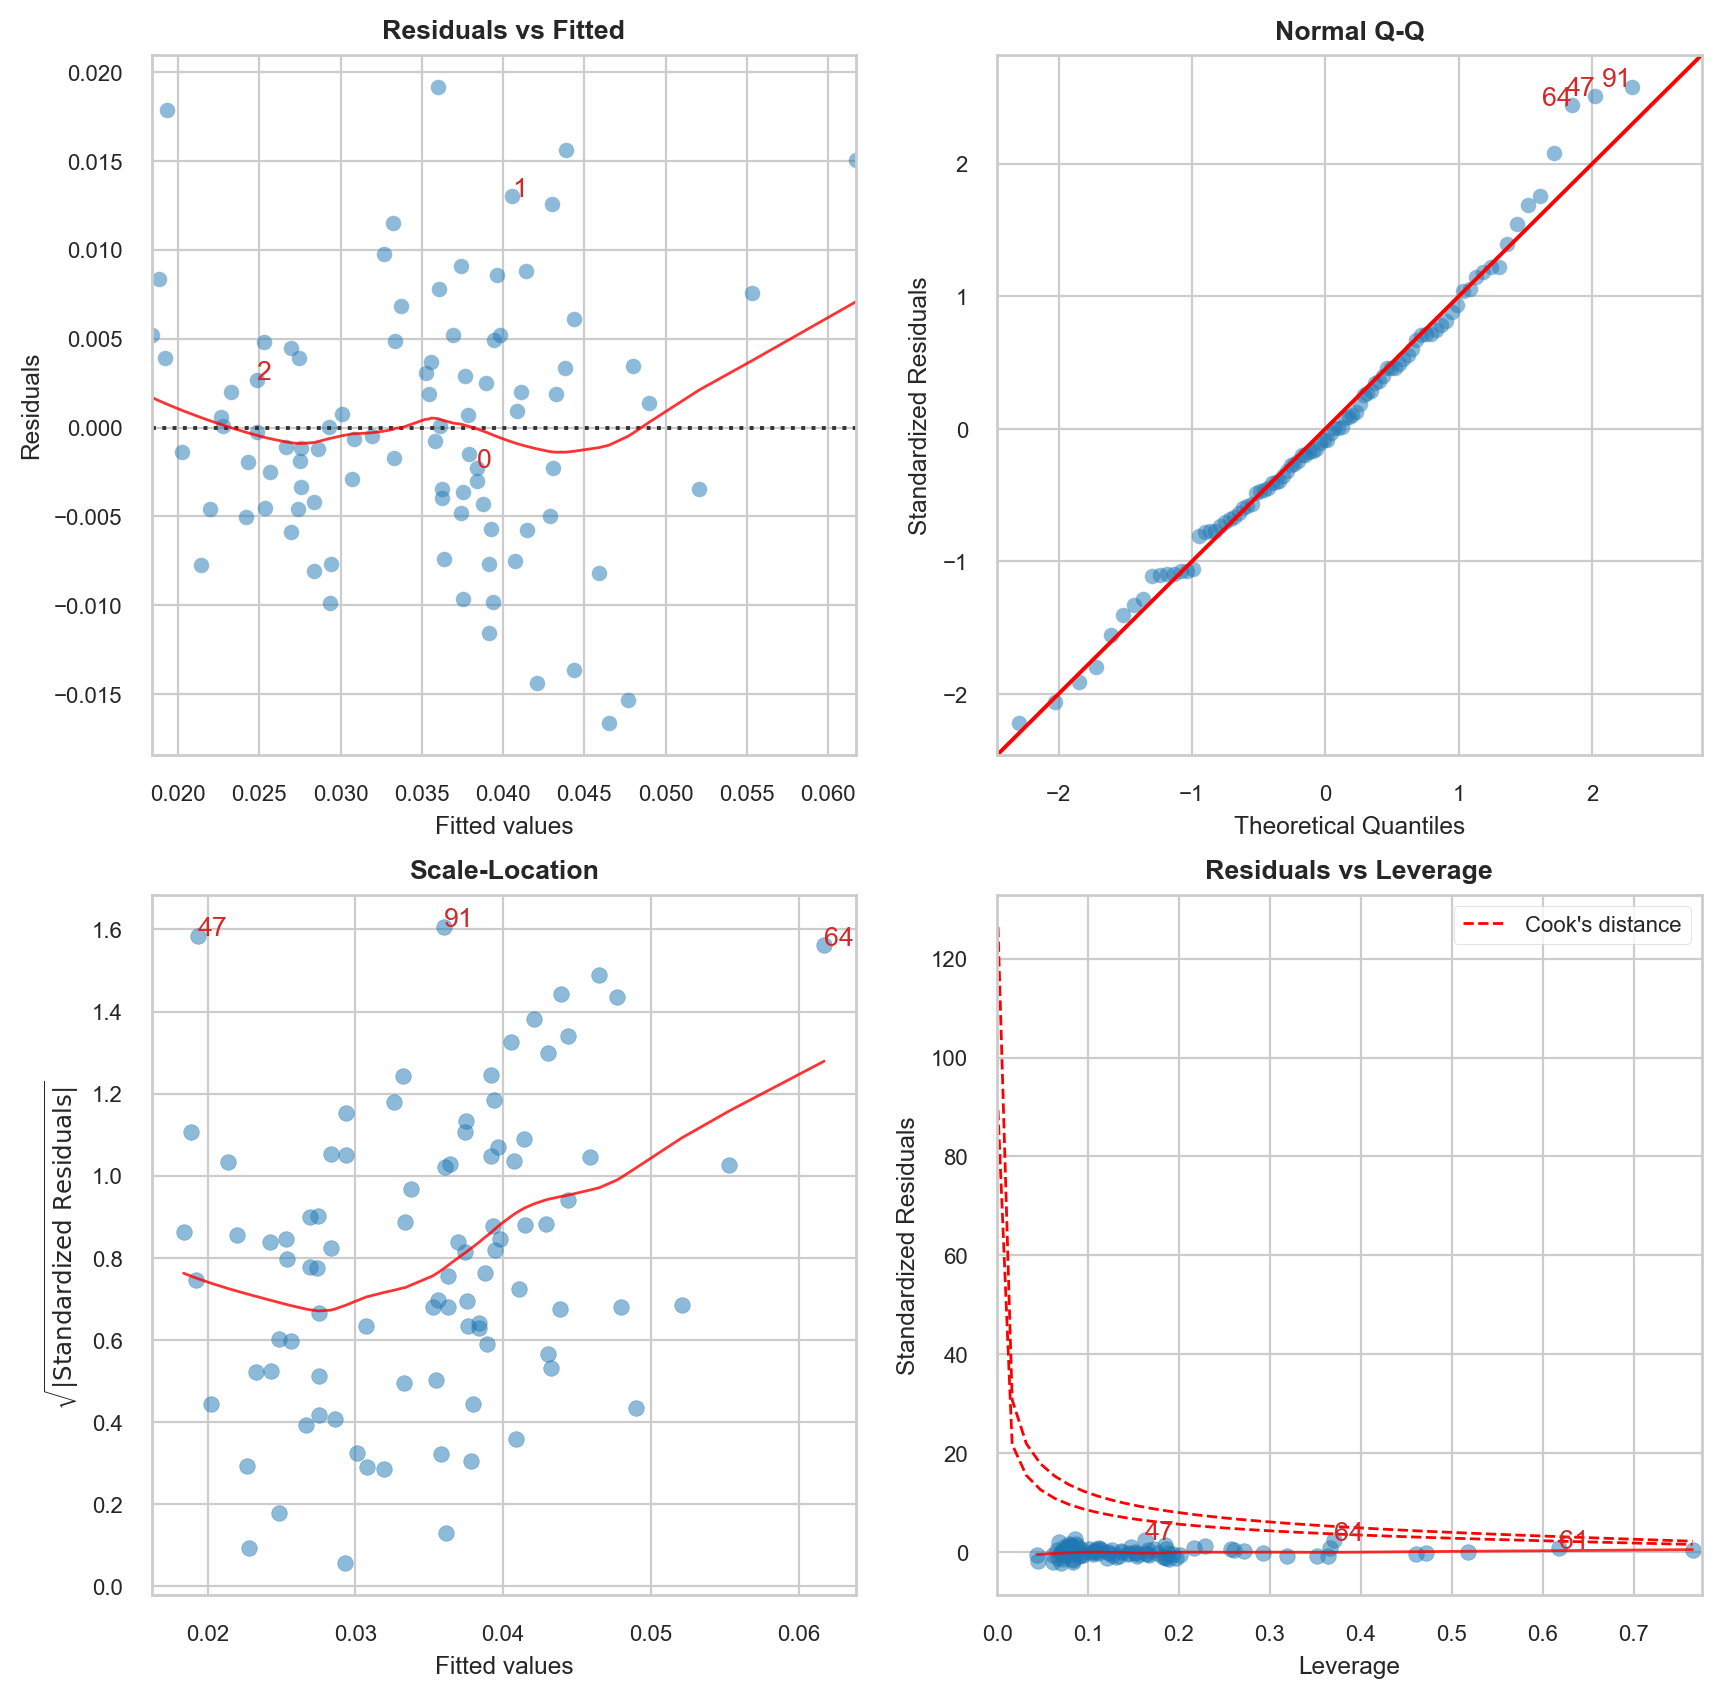

(<Figure size 1000x1000 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [334]:
diag_plots_diff()

## $\Delta_{pct}$

<AxesSubplot:>

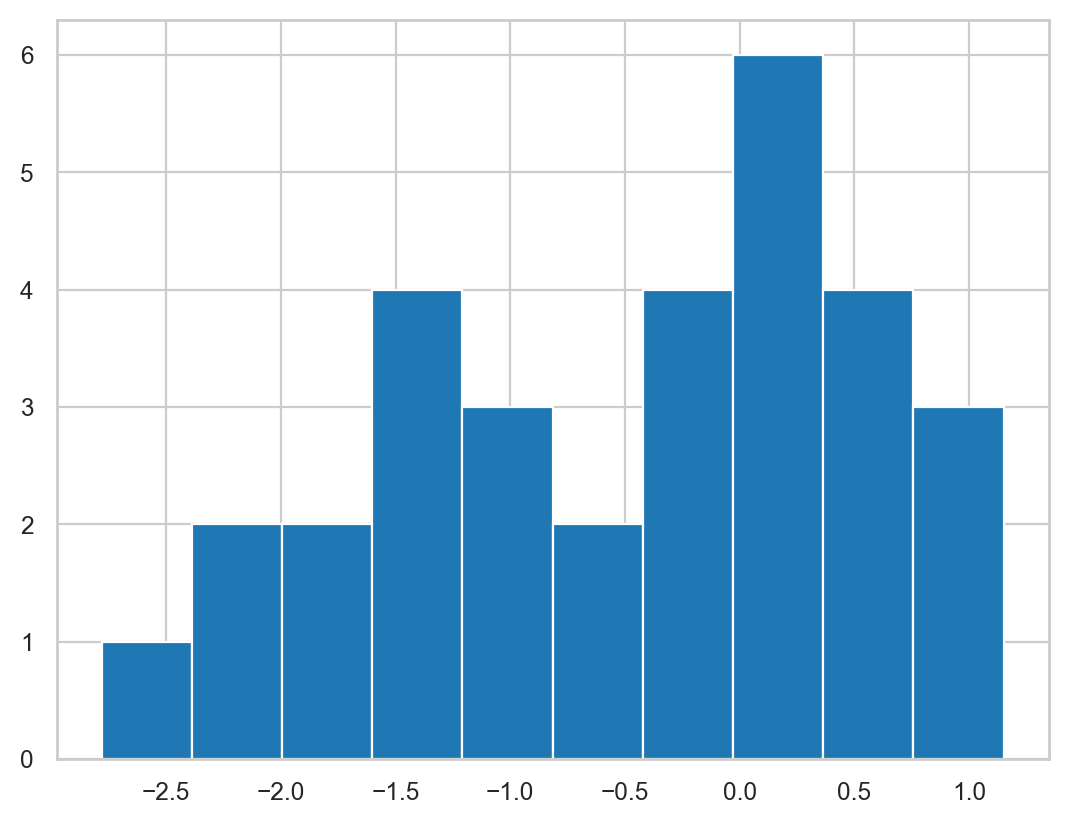

In [68]:
df_subset.pct_diff.apply(np.log).hist()

In [335]:
form_pct_pure = (
    "pct_diff ~ 1 + planar_measure + street_length_total + street_length_avg + street_density_km + "
    "intersection_density_km + self_loop_proportion +  circuity_avg + cyclomatic + meshedness  +"
    "population + pop_density + ALAND + AWATER + cyclomatic:meshedness + cyclomatic:circuity_avg"
)

In [336]:
model_pct = smf.ols(form_pct_pure, 
                    # drop the trqansformed % difference and use raw
                    df).fit()

In [337]:
model_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pct_diff   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     39.67
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           7.61e-64
Time:                        14:01:07   Log-Likelihood:                -1233.0
No. Observations:                 369   AIC:                             2496.
Df Residuals:                     354   BIC:                             2555.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -79.1918     62.741     -1.262      0.208    -202.584      44.200
planar_measure            -17.2439      0.992    -17.388      0.000     -19.194     -15.294
street_length_total        12.3415    154.526      0.080      0.936    -291.562     316.245
street_length_avg        -116.5646    148.042     -0.787      0.432    -407.718     174.589
street_density_km         100.5057     31.852      3.155      0.002      37.862     163.149
intersection_density_km  -101.5014     31.579     -3.214      0.001    -163.607     -39.396
self_loop_proportion       -0.6870      1.498     -0.459      0.647      -3.633       2.259
circuity_avg              416.2542    159.024      2.618      0.009     103.503     729.005
cyclomatic                 -8.9078    155.005     -0.057      0.954    -313.755     295.939
meshedness                 15.4592      7.183      2.152      0.032       1.333      29.586
population                  0.3347      1.481      0.226      0.821      -2.577       3.246
pop_density                 0.2452      1.091      0.225      0.822      -1.900       2.390
ALAND                       0.0896      2.143      0.042      0.967      -4.125       4.304
AWATER                     -0.4412      0.357     -1.236      0.217      -1.143       0.261
cyclomatic:meshedness      -1.2635      0.405     -3.118      0.002      -2.060      -0.467
cyclomatic:circuity_avg   -38.5286     14.576     -2.643      0.009     -67.196      -9.862
==============================================================================
Omnibus:                       20.161   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.220
Skew:                           0.345   Prob(JB):                     2.25e-08
Kurtosis:                       4.347   Cond. No.                     5.34e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [338]:
diag_plots_pct = Linear_Reg_Diagnostic(model_pct)

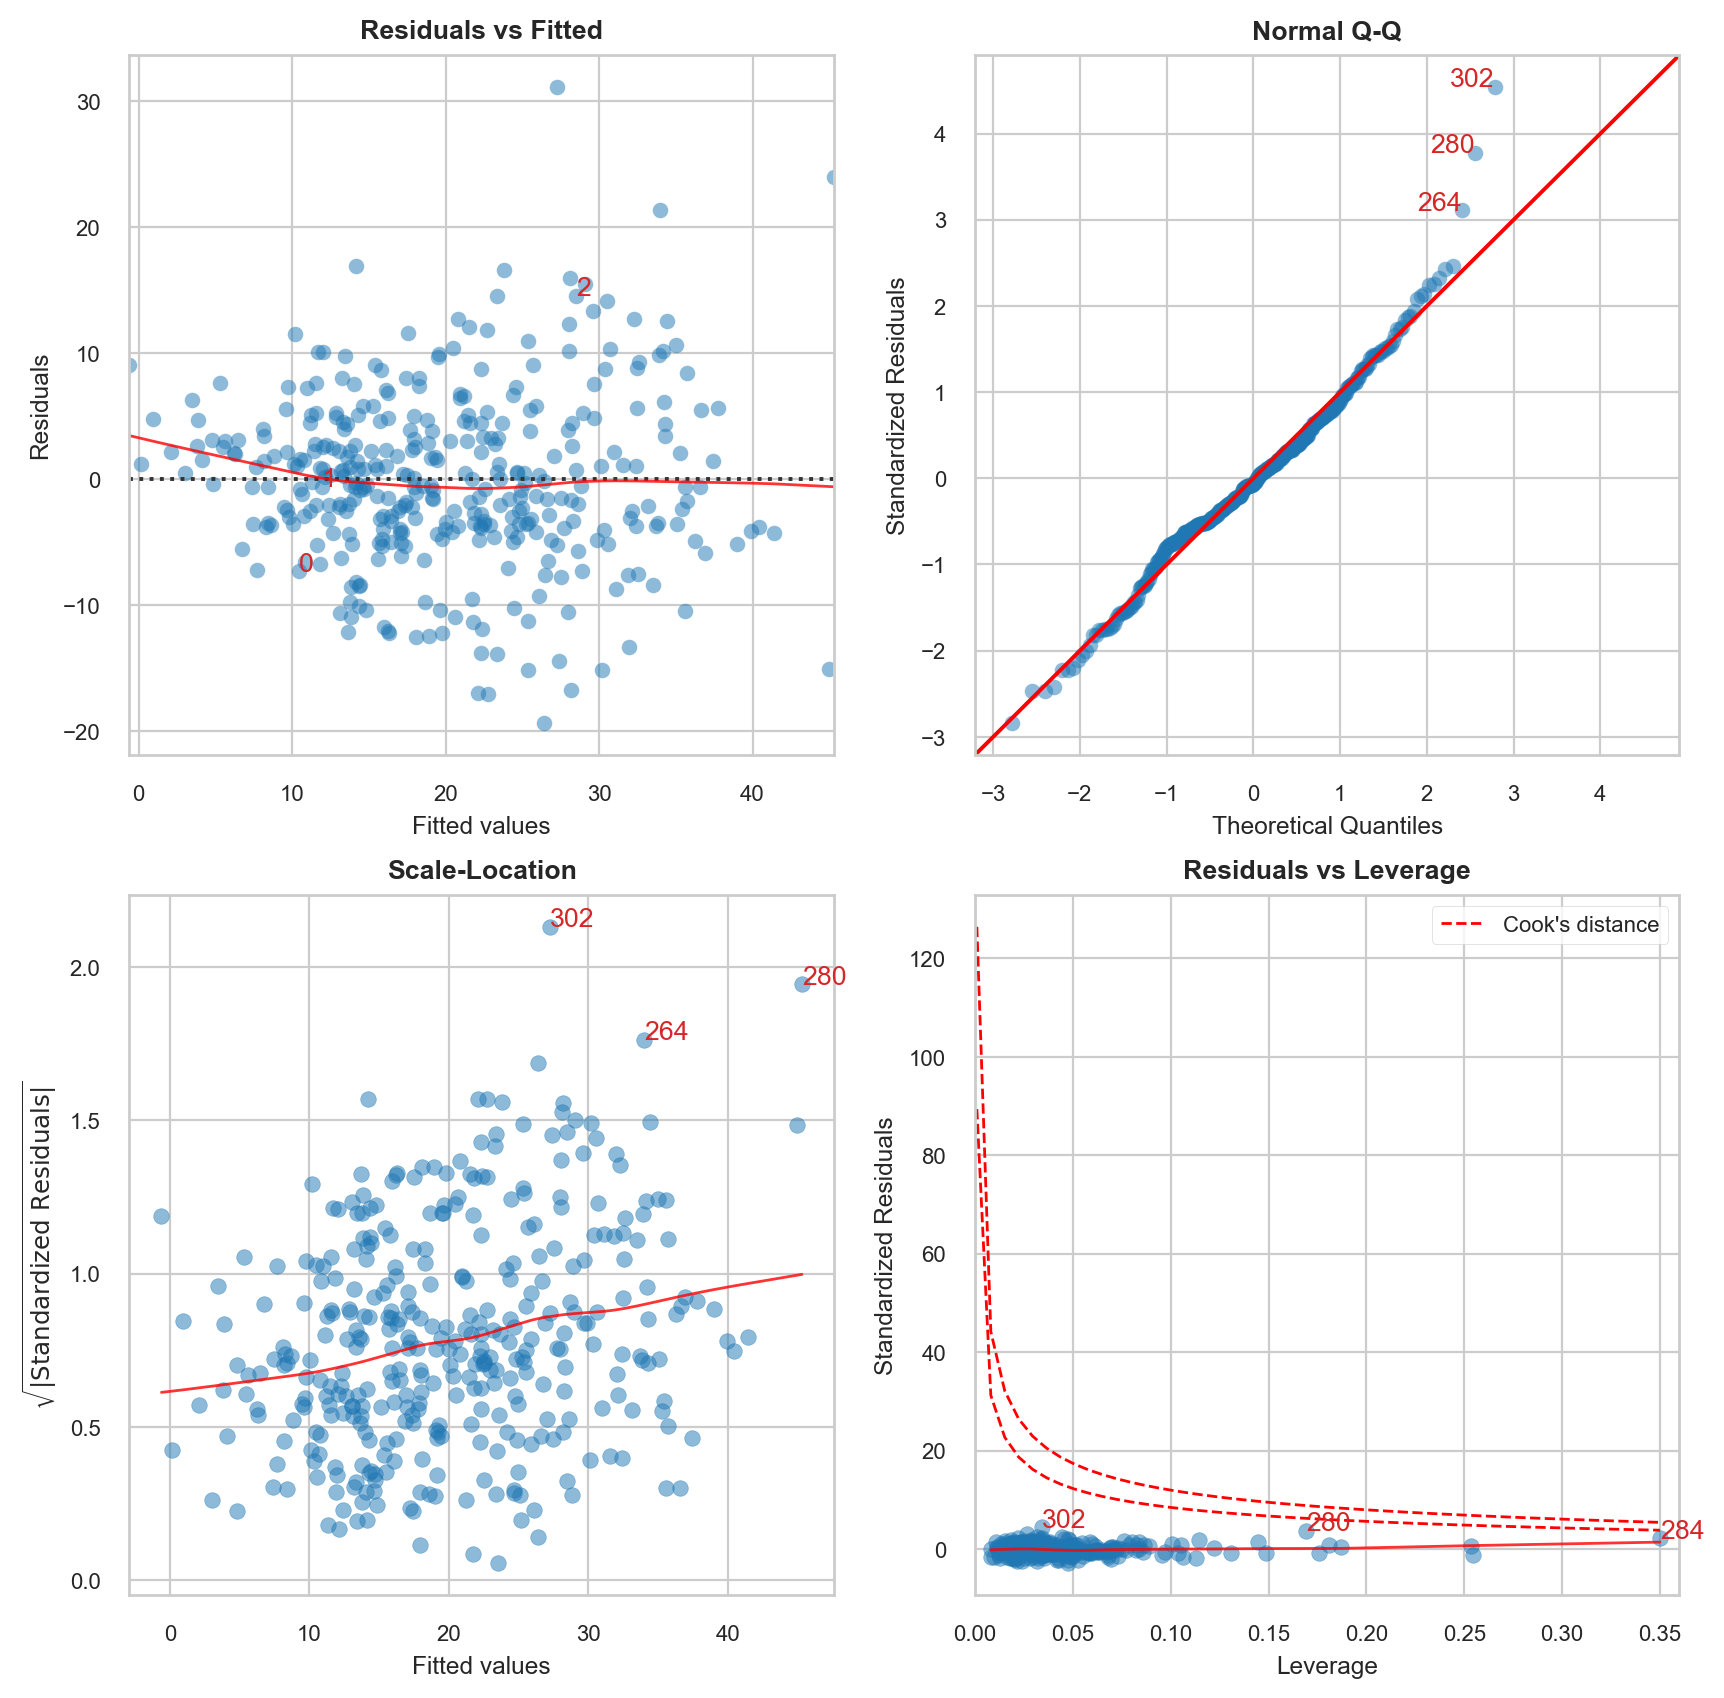

(<Figure size 1000x1000 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [339]:
diag_plots_pct()

In [340]:
model_pct_sub = smf.ols(form_pct_pure, 
                    # drop the trqansformed % difference and use raw
                    df_subset).fit()

In [341]:
model_pct_sub.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pct_diff   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     29.82
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           2.27e-25
Time:                        14:01:23   Log-Likelihood:                -258.74
No. Observations:                  92   AIC:                             547.5
Df Residuals:                      77   BIC:                             585.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -244.2150     93.447     -2.613      0.011    -430.293     -58.137
planar_measure            -12.8242      1.604     -7.994      0.000     -16.019      -9.630
street_length_total      -398.6655    317.412     -1.256      0.213   -1030.713     233.382
street_length_avg         256.2989    308.623      0.830      0.409    -358.248     870.846
street_density_km         140.9401     48.573      2.902      0.005      44.218     237.662
intersection_density_km  -137.3648     48.187     -2.851      0.006    -233.317     -41.413
self_loop_proportion        0.8663      2.253      0.385      0.702      -3.620       5.352
circuity_avg              649.7318    326.550      1.990      0.050      -0.512    1299.976
cyclomatic                396.7403    317.777      1.248      0.216    -236.034    1029.515
meshedness                -22.3398     17.362     -1.287      0.202     -56.911      12.232
population                  0.6856      1.805      0.380      0.705      -2.909       4.280
pop_density                -2.3505      1.176     -1.999      0.049      -4.691      -0.010
ALAND                       3.0362      2.344      1.295      0.199      -1.631       7.703
AWATER                      0.3665      0.581      0.631      0.530      -0.790       1.523
cyclomatic:meshedness       0.8170      0.779      1.049      0.297      -0.734       2.368
cyclomatic:circuity_avg   -56.6175     27.500     -2.059      0.043    -111.378      -1.857
==============================================================================
Omnibus:                        0.770   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.680   Jarque-Bera (JB):                0.544
Skew:                           0.188   Prob(JB):                        0.762
Kurtosis:                       3.033   Cond. No.                     4.74e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Results to table

In [347]:
model_diff.params

Intercept                 -0.084552
planar_measure             0.002158
street_length_total       -0.125474
street_length_avg         -0.031701
street_density_km          0.149336
intersection_density_km   -0.152175
self_loop_proportion      -0.001274
circuity_avg               0.653491
cyclomatic                 0.131993
meshedness                 0.020511
population                 0.000714
pop_density                0.000871
ALAND                     -0.000158
AWATER                    -0.001031
cyclomatic:meshedness     -0.002122
cyclomatic:circuity_avg   -0.061904
dtype: float64

In [348]:
# pull out variable names and escape for latex
names = model_diff.params.index.str.replace('_', '\_').tolist()

In [349]:
#names = [name.replace('np.', '') for name in names]

In [350]:
print(names[1])

planar\_measure


In [351]:
renamer = dict(zip(model_diff.params.index.tolist(), names))

In [352]:
print(renamer)

{'Intercept': 'Intercept', 'planar_measure': 'planar\\_measure', 'street_length_total': 'street\\_length\\_total', 'street_length_avg': 'street\\_length\\_avg', 'street_density_km': 'street\\_density\\_km', 'intersection_density_km': 'intersection\\_density\\_km', 'self_loop_proportion': 'self\\_loop\\_proportion', 'circuity_avg': 'circuity\\_avg', 'cyclomatic': 'cyclomatic', 'meshedness': 'meshedness', 'population': 'population', 'pop_density': 'pop\\_density', 'ALAND': 'ALAND', 'AWATER': 'AWATER', 'cyclomatic:meshedness': 'cyclomatic:meshedness', 'cyclomatic:circuity_avg': 'cyclomatic:circuity\\_avg'}


In [353]:
from stargazer.stargazer import Stargazer

In [354]:
results_table = Stargazer([model_diff, model_pct])
results_table.title('Segregation Difference')
results_table.custom_columns([r'$\Delta_{\tilde{H}}$', r'$\Delta_{pct}$'], [1, 1])
results_table.show_confidence_intervals(True)
results_table.rename_covariates(renamer)

In [355]:
# redirect print to write the stargazer table to file

import sys
original_stdout = sys.stdout # Save a reference to the original standard output

with open("../../paper/tables/regression.md", 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(results_table.render_latex())
    sys.stdout = original_stdout # Reset the standard output to its original value
